In [2]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

# ignore warnings because they are distracting 
import warnings
warnings.filterwarnings('ignore')

# suppress the scientific notation when printing numpy arrays
np.set_printoptions(suppress=True)

# Loading the data

In [3]:
df = pd.read_csv("./data/Weather_ALL.csv",
                 sep=';',
                 parse_dates=['Date'],
                 index_col=['Date'],
                 decimal=',')

In [4]:
# look at how many NaNs we have
df.isna().sum()

City                         0
Mean Temperature Actual      0
Low Temperature Actual       0
High Temperature Actual      0
Precipitation Actual        28
Wind Speed Actual            0
Relative Humidity Actual     0
dtype: int64

In [5]:
# drop NaNs
df.dropna(inplace=True)

# Histograms per Month

In [6]:
# show all cities
print([city for city in df['City'].unique()])

['Boston', 'Chicago', 'London', 'New York', 'San Francisco', 'Tokyo', 'Zurich']


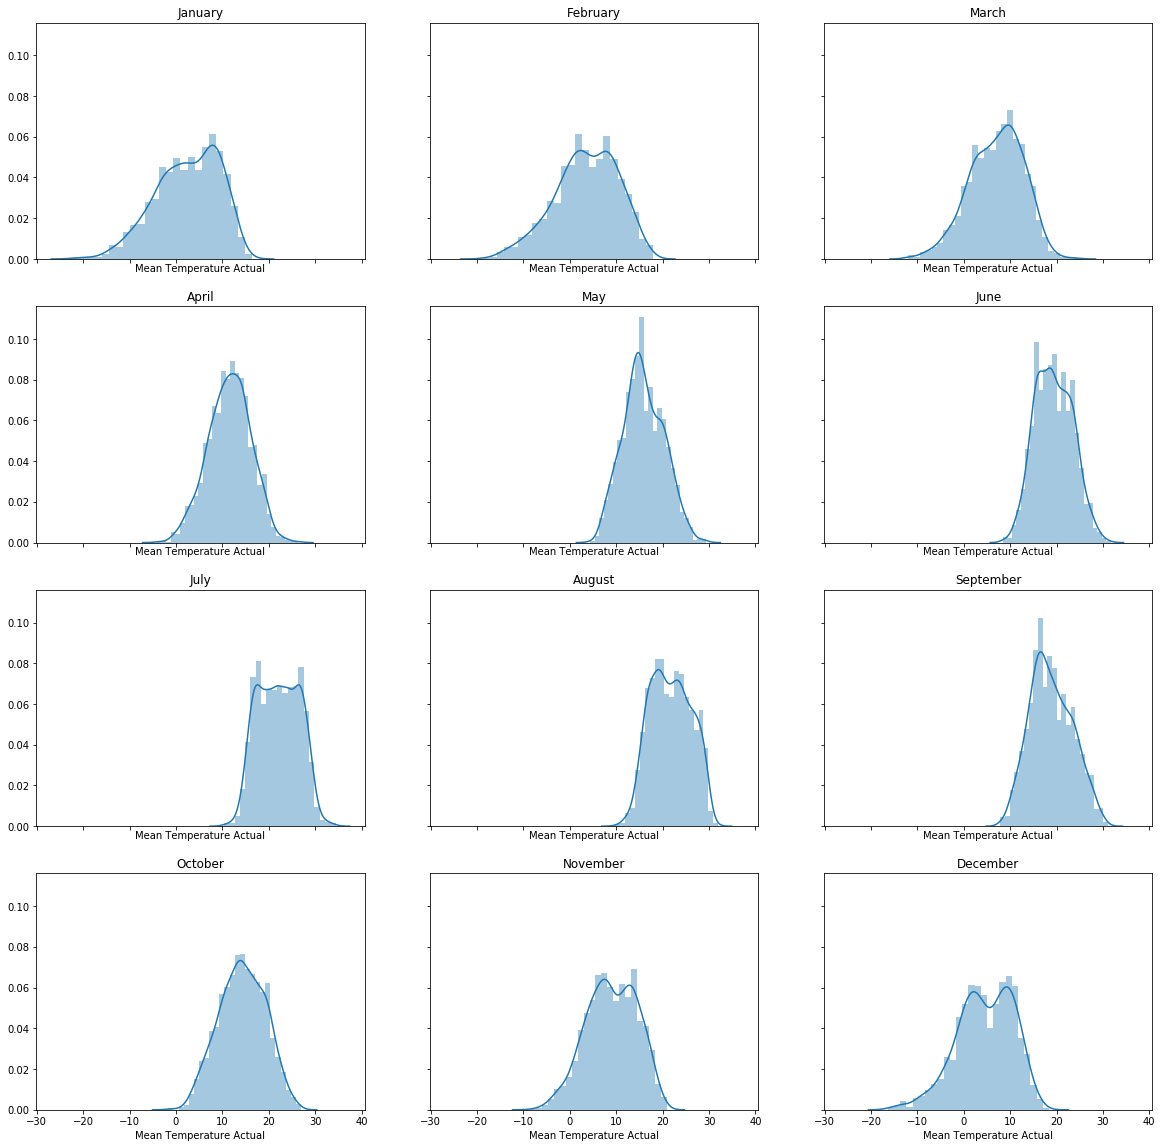

In [7]:
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=4, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(20,20)
                        )

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for month_i, ax in enumerate(axes.flatten()):
    
    subset = df[df.index.month == month_i+1]

    sns.distplot(subset['Mean Temperature Actual'], kde=True, ax=ax)
    ax.set_title(months[month_i])
    
# Save the full figure...
fig.savefig('./plots/monthly_temperatures.png')